In [114]:
import pandas as pd


# Загрузка данных из файла в DataFrame
df = pd.read_csv('ds0.txt', sep='\t')
x_values = df.iloc[:, 0].tolist()
y_values = df.iloc[:, 1].tolist()
left_error = df.iloc[:, 2].tolist()
right_error = df.iloc[:, 3].tolist()

41


$m(E) = A \cdot E^{\alpha}\cdot exp(-\frac{\beta}{E^{\delta}})$

In [68]:
def func(E, a, alpha, beta, delta):
    return  a * (E ** alpha) * np.exp(-beta / E**delta)

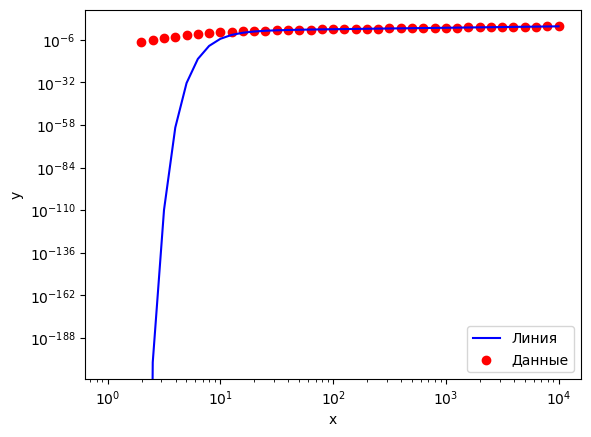

In [119]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

xdata = np.array(x_values)
#ydata = func(xdata, 2.5, 1.3, 0.5)
ydata = np.array(y_values)
popt, pcov = curve_fit(func, xdata, ydata, method='trf', maxfev=10000)
plt.loglog(xdata, func(xdata, *popt), 'b-', label='Линия')
plt.scatter(xdata, ydata, color='red', label='Данные')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

plt.show()

C:\Users\matsvei\AppData\Local\Temp\ipykernel_5444\503498411.py:2: RuntimeWarning: overflow encountered in exp
  return  a * (E ** alpha) * np.exp(-beta / E**delta)


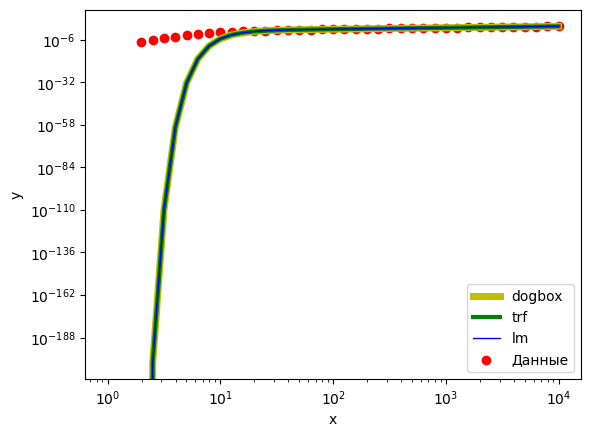

In [120]:
methods = ['lm', 'trf', 'dogbox']

popt1, pcov1 = curve_fit(func, xdata, ydata, method='lm', maxfev=10000)
popt2, pcov2 = curve_fit(func, xdata, ydata, method='trf', maxfev=10000)
popt3, pcov3 = curve_fit(func, xdata, ydata, method='dogbox', maxfev=10000)

plt.loglog(xdata, func(xdata, *popt3), 'y-', label='dogbox', linewidth=5)
plt.loglog(xdata, func(xdata, *popt2), 'g-', label='trf', linewidth=3)
plt.loglog(xdata, func(xdata, *popt1), 'b-', label='lm', linewidth=1)


plt.scatter(xdata, ydata, color='red', label='Данные')
plt.xlabel('x')
plt.ylabel('y')
standard_errors = np.sqrt(np.diag(pcov))
plt.legend()

plt.show()

36 36
Оптимальные параметры: [ 0.06717714  0.84286099 32.44284479  1.11906414]
Ковариационная матрица: [[ 5.14899512e-06 -9.51781220e-06 -3.82371020e-03 -6.31720867e-05]
 [-9.51781220e-06  1.79426809e-05  6.66601393e-03  1.11246586e-04]
 [-3.82371020e-03  6.66601393e-03  6.98025650e+00  9.03931097e-02]
 [-6.31720867e-05  1.11246586e-04  9.03931097e-02  1.28967613e-03]]
[ 0.06717714  0.84286099 32.44284479  1.11906414]
[[ 5.14899512e-06 -9.51781220e-06 -3.82371020e-03 -6.31720867e-05]
 [-9.51781220e-06  1.79426809e-05  6.66601393e-03  1.11246586e-04]
 [-3.82371020e-03  6.66601393e-03  6.98025650e+00  9.03931097e-02]
 [-6.31720867e-05  1.11246586e-04  9.03931097e-02  1.28967613e-03]]
Стандартные ошибки параметров: [2.26913973e-03 4.23588018e-03 2.64201751e+00 3.59120610e-02]


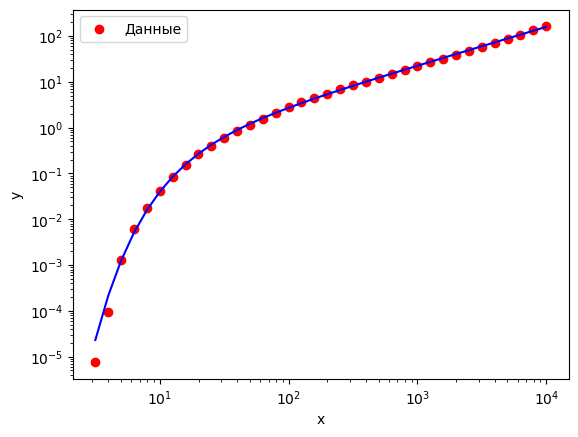

In [133]:
import random
import numpy as np



xdata = np.array(x_values[5:])
ydata = np.array(y_values[5:])
sigma = np.array([np.sqrt(left_error[i] ** 2 + left_error[i] ** 2) for i in range(5, len(left_error))])
print(len(xdata), len(sigma))

popt, pcov = curve_fit(func, xdata, ydata, sigma=sigma, method='trf', maxfev=10000)


print("Оптимальные параметры:", popt)
print("Ковариационная матрица:", pcov)
plt.loglog(xdata, func(xdata, *popt), 'b-', )
plt.scatter(xdata, ydata, color='red', label='Данные')
plt.xlabel('x')
print(popt)
print(pcov)
plt.ylabel('y')
standard_errors = np.sqrt(np.diag(pcov))
print("Стандартные ошибки параметров:", standard_errors)
plt.legend()
